In [128]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

I. Предобработка данных
=
## 1. Внешний вид (столбцы, дублирование)

In [129]:
df = pd.read_csv('medics_1.csv', sep=',', skipinitialspace=True, decimal=',')
df.columns = [col.lower().replace(',', '').replace('.', '').replace(" ", '_') for col in df.columns]
df.head(7)

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,толщина_паренхимы_почек,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез
0,нет,Стадия C1-C2,67,1,1,1,1,1,0,0,...,14.0,0,1,150,0,0,200,830,2900,900
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,15.0,1,4,235,143,121,600,640,900,800
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,17.0,0,1,210,0,0,250,0,1800,500
3,нет,Стадия C1-C2,62,1,1,0,1,1,1,0,...,16.0,1,3,210,71,43,500,1283,1700,1700
4,есть,Стадия C1-C2,55,1,1,1,1,1,0,0,...,15.0,1,3,265,116,74,500,1560,1800,1300
5,нет,Пациенты без ХБП,60,1,1,0,1,1,0,1,...,19.0,1,3,240,74,62,200,1350,2100,1800
6,есть,Стадия C1-C2,65,1,1,1,1,0,0,0,...,15.0,1,3,185,94,59,500,600,400,2000


Названия колонок отформатированы, пропусков много. 


In [241]:
df.drop_duplicates(inplace=True)

## 2. Пропуски, выбросы

**Добавим новую бинарную колонку "Есть_ли_пропуски"**  
          -1 - есть пропуск хотя бы в одной колонке.  
          - 0 - все данные есть.  
Заменять же пропуски будем по ходу работы с каждой колонкой отдельно. 

In [131]:
df['есть_ли_пропуски'] = df.isnull().any(axis=1).astype(int)
df.head()

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,Есть_ли_пропуски
0,нет,Стадия C1-C2,67,1,1,1,1,1,0,0,...,0,1,150,0,0,200,830,2900,900,0
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,1,4,235,143,121,600,640,900,800,1
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,0,1,210,0,0,250,0,1800,500,1
3,нет,Стадия C1-C2,62,1,1,0,1,1,1,0,...,1,3,210,71,43,500,1283,1700,1700,0
4,есть,Стадия C1-C2,55,1,1,1,1,1,0,0,...,1,3,265,116,74,500,1560,1800,1300,0


***

In [132]:
def graph_histplot_bin(dd, factor):  # Исследование количественных шкал, построение гистограммы и ящика с усами
    sns.set(style='white')
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    sns.histplot(dd[factor], bins=20, kde=True, ax=ax[0]) 
    sns.boxplot(data=dd, y=factor, ax=ax[1], color="pink")
    
    ax[0].axvline(np.mean(dd[factor]),color='r', linestyle='-', label='Среднее')
    ax[0].axvline(np.median(dd[factor]),color='b', linestyle='--', label='Медиана')
    
    ax[0].set_xlabel(factor.capitalize(), size=13)
    ax[0].set_ylabel('')
    ax[1].set_xlabel('')
    
    ax[0].legend(loc='center right')
    
    #plt.suptitle(f'Исследование данных на нормальность шкалы {factor}', size=12, y=1.01)
    plt.show()

In [133]:
df['мочевина_'].isna().sum()

1

Всего один пропуск, скорее всего он случайный.

In [134]:
df[df['мочевина_'].isnull()]

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,Есть_ли_пропуски
93,нет,Пациенты без ХБП,53,1,0,0,1,1,1,0,...,1,2,200,95,44,500,920,1600,3200,1


**Для дальнейшего удобства работы с данными, введем новую колонку "Возрастная_группа"**
  - 18-30 - "до 30"
  - 31-40 - "от 31 до 40"
  - ...
  - 61-70 "от 61 до 70"
  - 71+ "от 71"

In [180]:
def determine_age(x):
    if x <= 30:
        return "до 30"
    elif 30 < x <= 40:
        return "от 31 до 40"
    elif 41 <= x <= 50:
        return "от 41 до 50"
    elif 51 <= x <= 60:
        return "от 51 до 60"
    elif 61 <= x <= 70:
        return "от 61 до 70"
    else:
        return "от 70"

df['возрастная_группа'] = df['возраст'].apply(lambda x: determine_age(x))
df.head()

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,Есть_ли_пропуски,возрастная_группа
0,нет,Стадия C1-C2,67,1,1,1,1,1,0,0,...,1,150,0,0,200,830,2900,900,0,от 61 до 70
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,4,235,143,121,600,640,900,800,1,от 61 до 70
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,1,210,0,0,250,0,1800,500,1,от 41 до 50
3,нет,Стадия C1-C2,62,1,1,0,1,1,1,0,...,3,210,71,43,500,1283,1700,1700,0,от 61 до 70
4,есть,Стадия C1-C2,55,1,1,1,1,1,0,0,...,3,265,116,74,500,1560,1800,1300,0,от 51 до 60


Эту колонку мы создали для удобной группировки данных по возрасту пациента (особой разницы нет, 53 годы пациенту, или 54) 

Заменим пропуск данными, из таблицы, по колонкам, которые непосредственно [связанны с мочевиной в крови](https://gemotest.ru/info/spravochnik/analizy/mochevina-v-krovi/?ysclid=lutxxvppt3776924936).
> На результат анализа влияет возраст, пол, острые и хронические заболевания, беременность.

In [184]:
q = df.groupby(['возрастная_группа', 'пол', 'гб'])['мочевина_'].median()['от 51 до 60'][1][0]
q

5.0

In [186]:
df['мочевина_'].fillna(q, inplace=True)

___

In [139]:
df['хлориды'].unique()

array([100. ,   nan, 102. , 103. , 110.7, 100.5, 106. ,  99. , 105.7,
       104. , 109.8, 110. , 101. , 107.8, 107. ,  97. , 109. ,  98. ,
       115.1, 108.9, 108. , 114.4, 100.4, 109.7, 106.5, 102.8, 105. ,
       105.9, 102.4, 116.5, 115. , 104.6, 112. ,  99.8, 108.2, 108.3,
        96. ])

In [140]:
df['хлориды'].isna().sum()

23

В этой колонке уже больше пропусков.

In [141]:
df[df['хлориды'].isnull()].head()

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,Есть_ли_пропуски
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,1,4,235,143,121,600,640,900,800,1
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,0,1,210,0,0,250,0,1800,500,1
6,есть,Стадия C1-C2,65,1,1,1,1,0,0,0,...,1,3,185,94,59,500,600,400,2000,1
13,нет,Пациенты без ХБП,57,1,1,0,1,0,0,1,...,0,1,150,0,0,400,0,1400,250,1
44,есть,Пациенты без ХБП,52,1,1,0,1,0,1,0,...,1,2,345,167,134,700,602,1600,1000,1


In [142]:
df['кальций'].unique()

array([0.99, 1.02, 0.96, 0.94, 0.85, 1.12, 1.22, 1.2 , 0.82, 0.9 , 1.1 ,
        nan, 1.13, 0.88, 1.14, 1.24, 1.01, 1.  , 1.11, 1.16, 0.98, 0.86,
       0.78, 0.79, 2.33, 0.89, 0.83, 0.8 , 0.87, 1.06, 1.05, 1.15, 1.26,
       1.21, 1.07, 0.73, 1.04, 0.72, 1.08, 1.09, 1.03, 0.95, 0.84, 0.71,
       2.4 , 0.7 , 1.6 , 0.75, 1.44, 2.32, 0.93, 1.17])

In [143]:
df['кальций'].isna().sum()

19

Проверим сколько есть пациентов, с пропусками в факторах кальций и хлориды.

In [144]:
query = (df['хлориды'].isnull()) & (df['кальций'].isnull())
a =  df.loc[query]
a

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,Есть_ли_пропуски
13,нет,Пациенты без ХБП,57,1,1,0,1,0,0,1,...,0,1,150,0,0,400,0,1400,250,1
64,есть,Стадия C1-C2,54,1,1,0,1,1,0,0,...,0,1,245,0,0,250,0,1800,700,1
75,есть,Пациенты без ХБП,54,1,1,0,1,1,0,0,...,0,1,160,0,0,200,0,1700,1000,1
87,нет,Пациенты без ХБП,55,1,0,1,1,1,0,0,...,1,2,260,124,98,500,820,700,1400,1
93,нет,Пациенты без ХБП,53,1,0,0,1,1,1,0,...,1,2,200,95,44,500,920,1600,3200,1
104,есть,Пациенты без ХБП,46,0,0,0,1,1,0,0,...,1,2,170,67,44,500,1320,700,1700,1
173,есть,Стадия С3,60,1,1,0,1,1,0,0,...,1,3,230,79,58,500,1010,1750,3300,1
174,нет,Стадия C1-C2,40,1,1,0,1,0,0,0,...,0,1,170,0,0,250,0,1400,1000,1


In [145]:
for i in a.columns:
    if len(a[i].unique()) == 1:
        print(i, a[i].unique())

стенокардия [1]
а-в_блокада [0]
хлориды [nan]
кальций [nan]
Есть_ли_пропуски [1]


У всех, у кого нет данных по хлоридам и кальцию есть заболевание стенокардия и не было проведена ав блокада.

> __Стенокардия__ – заболевание, обусловленное несоответствием между потребностью миокарда в кислороде и его доставкой, приводящее к нарушениям функций сердца.  
> __Атриовентрикулярная (АВ) блокада__ – частичное или полное прерывание проведения импульса от предсердий к желудочкам. Наиболее частой причиной является идиопатический фиброз или склероз проводящей системы сердца. Диагноз ставится на основании результатов электрокардиографии

Заполним хлорид и кальций усредненными значениями

In [206]:
df['хлориды'] = df['хлориды'].fillna(
    a.groupby(['гб', 'возрастная_группа'])['хлориды'].transform('median'))

In [207]:
df['кальций'] = df['кальций'].fillna(
    a.groupby(['возрастная_группа', 'гб'])['кальций'].transform('median'))

***

In [146]:
df['рн'].unique()

array(['7,42', '7,49', '7,37', '7,44', '7,41', '8,35', '7,48', '7,43',
       '7,46', '7,55', '7,4', '7,45', '7,51', '7,47', '7,31', '7,39',
       '7,52', '7,34', '7,35', '7,38', '7,5', '2', '1.88', '2.01', '7,36'],
      dtype=object)

Изменим тип данных на правильный.

In [147]:
df['рн'] = df['рн'].str.replace(",", ".")
df = df.astype({'рн': float})

***

In [148]:
df['оксигем'].unique()

array([ 99. ,  98.8,  96.6,  99.4,  99.6,  98. ,  98.5,  99.9,  99.2,
       146. ,  97.4,  99.3,  99.7,  98.7,  97.8,  98.9,  97.9,  99.8,
        98.3,  98.1,  98.6,  99.5,  97.3,  93.9,  96.7,  97.7,  97. ,
        97.5,  66. ,  95.7,  97.6,  98.2,  96. ,  97.1,  99.1,  94.8,
        95.3,  98.4,  96.9])

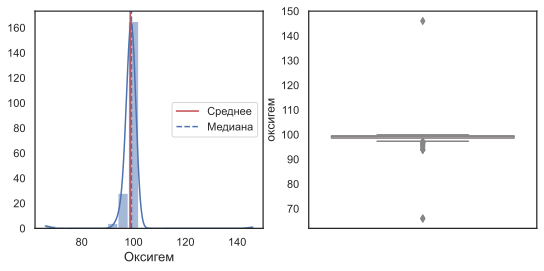

In [149]:
graph_histplot_bin(df, 'оксигем')

**Оксигем** - показатель крови, % (SaO2), проценты не могут быть > 100, изменим на медиану все значения, которые превышают 100

In [150]:
median = df[df['оксигем'] != 140]['оксигем'].median()

df['оксигем'] = df['оксигем'].apply(lambda x: median if x > 100 else x)

***

In [151]:
df['чсс'].unique()

array(['61', '66', '67', '94', '81', '74', '62', '83', '104', '88', '80',
       '91', '84', '77', '50', '119', '70', '79', '75', '68', '98', '73',
       '76', '60', '69', '57', '64', '1000', '58', '59', '7o', '65', '47',
       '54', '55', '56', '72', '41', '78', '46', '105', '82', '51', '52',
       '107', '115', '42', '93', '63', '44', '53', '49', '102'],
      dtype=object)

У фактора ЧСС неправильный тип данных из-за опечатки.

In [152]:
df['чсс'] = df['чсс'].replace('7o', '70')
df = df.astype({'чсс': np.int64})
df['чсс']

0      61
1      66
2      67
3      94
4      81
       ..
195    58
196    53
197    83
198    65
199    70
Name: чсс, Length: 200, dtype: int64

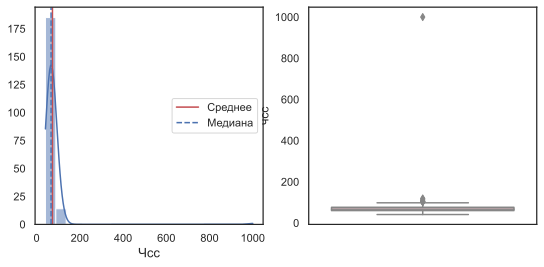

In [153]:
graph_histplot_bin(df, 'чсс')

Заменим на медиану аномальное значение 1000 ударов/минута.

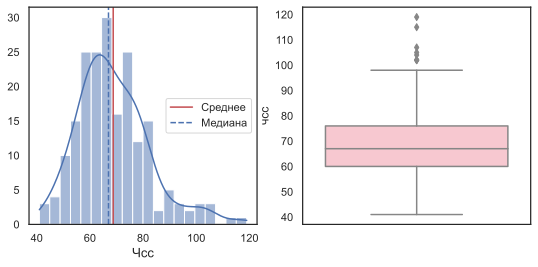

In [154]:
median = df[df['чсс'] != 1000]['чсс'].median()

df['чсс'] = df['чсс'].apply(lambda x: median if x == 1000 else x)

graph_histplot_bin(df, 'чсс')

***

In [155]:
df['мо'].unique()

array([ 6.78,  5.82,  4.26,  6.54,  4.98,  5.1 ,  5.22,  6.18,  5.86,
        5.52,  4.08,  5.34,  6.36,  4.62,  4.74,  5.94,  7.14,  5.28,
        6.12,  5.64,  3.18,  5.16,  8.1 ,  3.84,  7.74,  7.44,  4.86,
        8.58,  8.52,  7.56,  5.46,  4.38,  6.  ,  4.72,  4.68,  4.44,
        5.4 ,  4.2 ,  7.98,  5.76,  7.32,  6.96,  7.02,  6.42,  3.66,
        5.04,  3.96,  3.78,  4.5 ,  7.26,  6.06,  5.58,  4.56,  7.08,
        6.24,  2.34,  4.02,  9.18,  6.84,  8.04, 72.6 ,  6.3 ,  6.66,
        4.8 ])

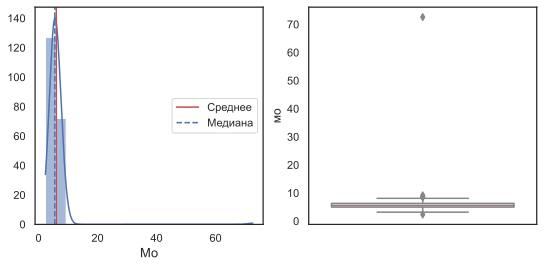

In [156]:
graph_histplot_bin(df, 'мо')

Для того чтобы проверить, является ли число 70 аномальным для минутного обьема сердца, рассмотрим данные о конкретном пациенте, с таким высоким показателем мо.

In [157]:
df.query("мо > 60")

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,Есть_ли_пропуски
167,есть,Пациенты без ХБП,73,1,1,1,1,1,0,1,...,1,2,200,83,34,450,1440,1500,800,0


[У минутного объема сердца (МО) есть формула, по которой она рассчитывается.](http://vmede.org/sait/?id=Gospitalnaya_ter_card_storojakova_2008_t1&menu=Gospitalnaya_ter_card_storojakova_2008_t1&page=6&ysclid=lura2nfw6d323379373) Перепроверим, может ли быть МО = 70, посчитав ее по этой формуле.
> "Минутный объем сердца (МО) вычисляют умножением УО на число сердечных сокращений"

In [158]:
mo = np.round((df.query("мо > 60")['уо'] * df.query("мо > 60")['чсс']) / 1000, 2) # /1000 потому что уо в мл, а мо - в литрах
mo[167]

7.38

Таким образом, значение МО = 72.6 - выброс, заменим его вычисленным значением.

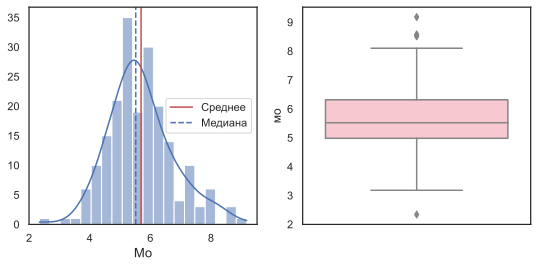

In [159]:
df['мо'] = df['мо'].apply(lambda x: mo[167] if x == 72.6 else x)
graph_histplot_bin(df, 'мо')

***

In [160]:
df['кдр_правого_желудочка'].unique()

array([2.7, 2.6, 3. , 2.2, 2.3, 2.4, 2.5, 2.8, 2.9, 2.1, 3.1, 5.1, 3.3,
       3.2, 1.7, 2. ])

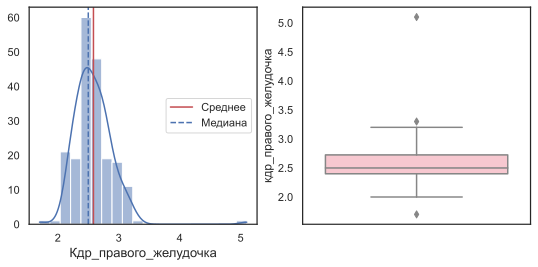

In [161]:
graph_histplot_bin(df, 'кдр_правого_желудочка')

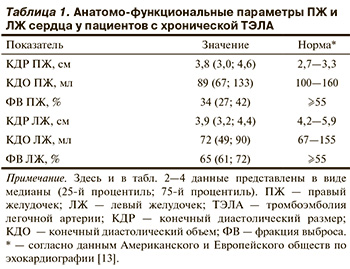

Значение 5 выбросом не является.

***

In [162]:
df['алат'].unique()

array([ 41,  39,  29,  19,  20,  49,  28,  18,  57,  30,  50,  11,  24,
        22,   8,  85,  25,  15,  37,  26,  34,  27,  12,  36,  17,  16,
        21,  88,  23,  10,  14,  35,  31,  44, 144,  72,  40,   7,  38,
        80,  32,  67,  33,  87,  56,  45,  13,  54,  42,  43,  59,  81,
        53,  65,  89,  51], dtype=int64)

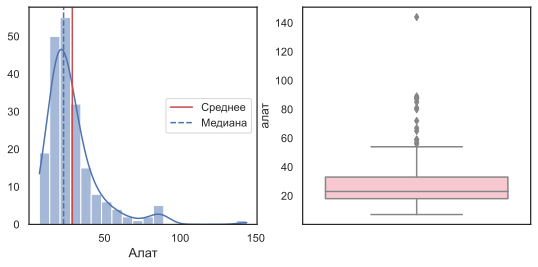

In [163]:
graph_histplot_bin(df, 'алат')

Норма у здорового человека **7—41 МЕ/л**

[Источник.](https://gemotest.ru/info/spravochnik/analizy/alt-alat-alaninaminotransferaza-alanintransaminaza/?ysclid=lusme893gj697663596) 
> В острой стадии заболевания концентрация АЛТ в крови может превышать норму в 10–40 раз. В хронической — в 2–5 раз.

[Подтвердим информацию другим источником:](https://yandex.ru/health/turbo/articles?id=4552&ysclid=lusmn6xb3d591388467)
> Острые вирусные и токсические гепатиты, при которых концентрация АЛТ возрастает в 20 раз и более. В некоторых случаях болезни Боткина увеличение концентрации данного фермента в крови может предшествовать желтушному окрашиванию кожи. При вирусных гепатитах В и С показатель АЛТ может увеличиваться даже в 100 раз, характеризуя при этом токсическое влияние вируса на клетки печени. У лиц с хроническими гепатитами повышение уровня описываемого фермента может служить маркером нового обострения заболевания. Однако в последнем случае АЛТ повышается не более, чем в 3-5 раз. 

Поэтому, хоть показатель 144 и выглядит как выброс, но такой показатель возможен, и показывыет на острую стадию заболевания.

***

In [211]:
df['лпонп'].isna().sum()

10

In [212]:
df['лпнп'].isna().sum()

0

Обнаружили еще пропуски.

In [216]:
df['лпнп'] = df['лпнп'].fillna(
    a.groupby(['стенокардия', 'возрастная_группа'])['лпнп'].transform('median'))
df['лпонп'] = df['лпонп'].fillna(
    a.groupby(['стенокардия', 'возрастная_группа'])['лпонп'].transform('median'))

***

In [167]:
df['толщина_паренхимы_почек'].unique()

array([14. , 15. , 17. , 16. , 19. ,  nan, 13. , 18. , 11. , 10. , 12. ,
       13.5])

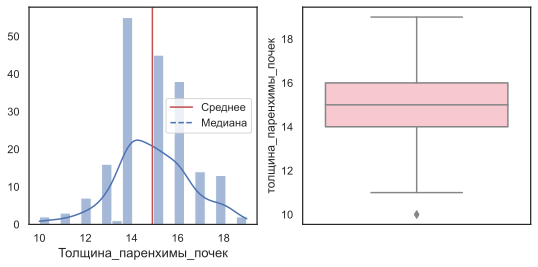

In [168]:
graph_histplot_bin(df, 'толщина_паренхимы_почек')

In [221]:
df['толщина_паренхимы_почек'] = df['толщина_паренхимы_почек'].fillna(
    a.groupby(['развитие_опп', 'возрастная_группа'])['толщина_паренхимы_почек'].transform('median'))

***

***
### 3. Сформировать дополнительный столбец с данными по пациентам, прооперированным с использованием АИК, которым проводилось переливание крови


***
### 4. Провести аналитический и графический анализ данных

***
# II. Расчет, исследование

__Перечень задач__  
посчитать процент пациентов с хроническими заболеваниям
(сахарный диабет, гипертония, хроническая болезнь почек) для
групп “есть ОПП/нет ОПП”  

ввести новый фактор (описать и обосновать выбор фактора и
его значений) на основе столбца “Индекс массы тела”.

Посчитать количество пациентов, имеющих проблемы с
сердцем (выбор перечня проблем должен быть описан и
обоснован) для каждой группы. Сделать вывод.  

исследовать зависимость длительности операции от факта
перенесенного в прошлом инфаркта миокарда
верно ли, что у пациентов с ИМТ выше нормы будет
повышенный уровень холестерина?  

верно ли, что даже без хронических болезней почек с
возрастом толщина паренхимы почек уменьшается  

Проверить адекватность поставленного диагноза по стадии
хронической болезни почек (найти параметр, по которому
ставится диагноз, использовать данные из внешних источников)  

Исследовать корреляцию между параметрами. Для наиболее
сильных корреляций обосновать, имеет ли это реальный смысл
или же просто особенность данных
